<a href="https://colab.research.google.com/github/Tsuma532/hello-world/blob/master/MLearning_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Load and preprocess the MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape images to include a channel dimension (for grayscale, it's 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the deep neural network model
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),  # Input layer for 28x28 grayscale images
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),  # Convolutional layer
        layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),  # Another convolutional layer
        layers.MaxPooling2D(pool_size=(2, 2)),  # Another max pooling layer
        layers.Flatten(),  # Flatten the output for the dense layers
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(10, activation="softmax"),  # Output layer with 10 classes (digits 0-9)
    ]
)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
batch_size = 128
epochs = 15
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

# Make predictions on a sample image
sample_image = x_test[0]
predicted_probabilities = model.predict(np.expand_dims(sample_image, 0))
predicted_class = np.argmax(predicted_probabilities[0])
print(f"Predicted class for the first test image: {predicted_class}")
print(f"Actual class for the first test image: {y_test[0]}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.7586 - loss: 0.7753 - val_accuracy: 0.9802 - val_loss: 0.0818
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9621 - loss: 0.1242 - val_accuracy: 0.9850 - val_loss: 0.0579
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9729 - loss: 0.0883 - val_accuracy: 0.9867 - val_loss: 0.0477
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 76s 90ms/step - accuracy: 0.9775 - loss: 0.0719 - val_accuracy: 0.9903 - val_loss: 0.0417
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.9806 - loss: 0.0626 - val_accuracy: 0.9898 - val_loss: 0.0403
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9826 - loss: 0.0561 - val_accuracy: 0.9907 - val_loss: 0.0390
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9843 - loss: 0.0514 - val_accuracy: 0.9902 - val_loss: 0.0364
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━

In [62]:
# Make predictions on a sample image
sample_image2 = x_test[1000]
predicted_probabilities = model.predict(np.expand_dims(sample_image2, 0))
predicted_class = np.argmax(predicted_probabilities[0])
print(f"Predicted class for the first test image: {predicted_class}")
print(f"Actual class for the first test image: {y_test[1000]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class for the first test image: 9
Actual class for the first test image: 9


Plotting Training/Validation Curves (Loss/Accuracy vs. Epochs):

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

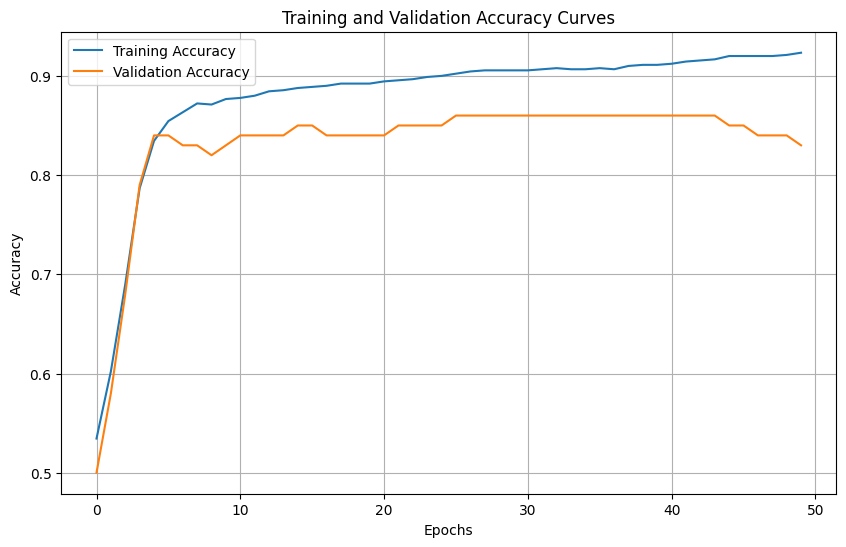

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# 2. Train a model and record metrics
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)
train_accuracies = []
val_accuracies = []
epochs = 50

for epoch in range(epochs):
    model.fit(X_train, y_train) # Train for one epoch
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    train_accuracies.append(accuracy_score(y_train, train_pred))
    val_accuracies.append(accuracy_score(y_val, val_pred))

# 3. Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Using Learning Curves (Performance vs. Training Set Size):

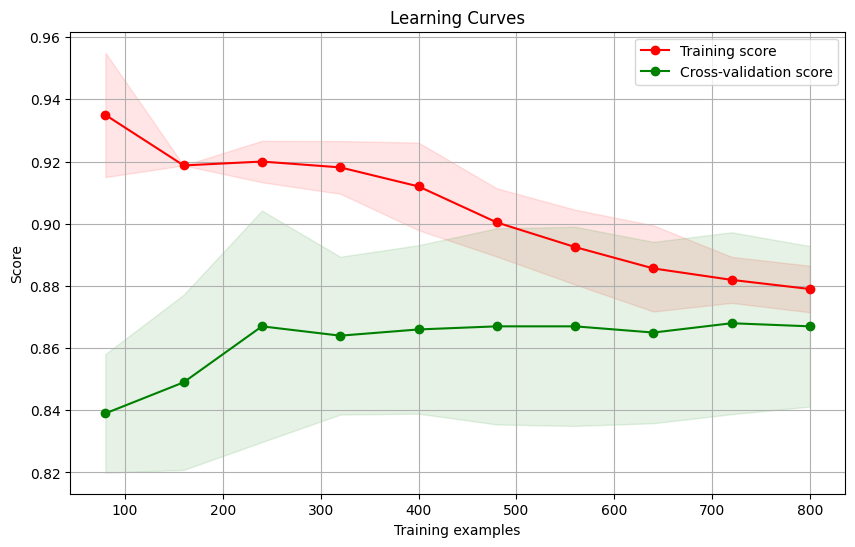

In [73]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# ... (X, y, X_train, X_val, y_train, y_val from above)

# 1. Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=1000, solver='liblinear'), X, y, cv=5,
    scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# 2. Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# 3. Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [75]:
print(val_scores_mean)

[0.839 0.849 0.867 0.864 0.866 0.867 0.867 0.865 0.868 0.867]


In [74]:
print(train_scores_mean)

[0.935      0.91875    0.92       0.918125   0.912      0.90041667
 0.8925     0.885625   0.88194444 0.879     ]
